**Import 
** 

In [1]:
import os
for dirname,_,filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print (os.path.join(dirname,filename))

/kaggle/input/productdemandforecasting/Historical Product Demand.csv


In [2]:
import pandas as pd # Data handling and managing
import numpy as np  # Handiling linear Algera
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline


df = pd.read_csv('../input/productdemandforecasting/Historical Product Demand.csv', parse_dates=['Date'])
df.head(100) # Getting the first 100 rows to view the records
#df.shape

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012-07-27,100
1,Product_0979,Whse_J,Category_028,2012-01-19,500
2,Product_0979,Whse_J,Category_028,2012-02-03,500
3,Product_0979,Whse_J,Category_028,2012-02-09,500
4,Product_0979,Whse_J,Category_028,2012-03-02,500
...,...,...,...,...,...
95,Product_1512,Whse_J,Category_019,2012-06-15,30000
96,Product_1512,Whse_J,Category_019,2012-06-20,30000
97,Product_1512,Whse_J,Category_019,2012-07-04,30000
98,Product_1274,Whse_J,Category_019,2012-06-19,1000


In [3]:
df.dtypes

Product_Code                object
Warehouse                   object
Product_Category            object
Date                datetime64[ns]
Order_Demand                object
dtype: object

In [4]:
# Check for the columns which got has the NaN values
print(df.isnull().any().sum(), ' / ', len(df.columns))
# Check any number of data points with NaN
print(df.isnull().any(axis=1).sum(),'/', len(df))



1  /  5
11239 / 1048575


In [5]:
df.dropna(axis=0, inplace=True) #Remove all the rows with null values
df.reset_index(drop=True)
df.sort_values('Date')[1:50]

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
72252,Product_1724,Whse_A,Category_003,2011-05-31,108
8431,Product_1521,Whse_S,Category_019,2011-06-24,85000
8432,Product_1521,Whse_S,Category_019,2011-06-24,7000
72669,Product_1507,Whse_C,Category_019,2011-09-02,1250
17249,Product_0608,Whse_C,Category_001,2011-09-27,5
17250,Product_1933,Whse_C,Category_001,2011-09-27,23
74615,Product_0875,Whse_C,Category_023,2011-09-30,5450
131426,Product_0125,Whse_S,Category_011,2011-10-20,(2)
131429,Product_0412,Whse_S,Category_007,2011-10-20,(2)
75193,Product_0642,Whse_C,Category_019,2011-10-31,3


In [6]:
#df.dropna().sum()

In [7]:
df['Order_Demand']=df['Order_Demand'].str.replace('(',"")
df['Order_Demand']=df['Order_Demand'].str.replace(')',"")
df.head(100)
#Since the "()" has been removed , Now i Will change the data type.

df['Order_Demand'] = df['Order_Demand'].astype('int64')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  


In [8]:
df.sort_values('Date')[10:20]

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
75193,Product_0642,Whse_C,Category_019,2011-10-31,3
121820,Product_0202,Whse_A,Category_007,2011-11-04,100
121819,Product_0202,Whse_A,Category_007,2011-11-04,400
131028,Product_2143,Whse_S,Category_009,2011-11-18,25
131031,Product_0131,Whse_S,Category_021,2011-11-18,12
131032,Product_0288,Whse_S,Category_021,2011-11-18,50
44450,Product_0980,Whse_A,Category_028,2011-11-18,4000
131027,Product_2138,Whse_S,Category_009,2011-11-18,49
131026,Product_2137,Whse_S,Category_009,2011-11-18,25
44795,Product_0965,Whse_A,Category_006,2011-11-18,1


In [9]:
#Get the Hieghest and lowest dates in the dataset.
df['Date'].min() , df['Date'].max()

(Timestamp('2011-01-08 00:00:00'), Timestamp('2017-01-09 00:00:00'))

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


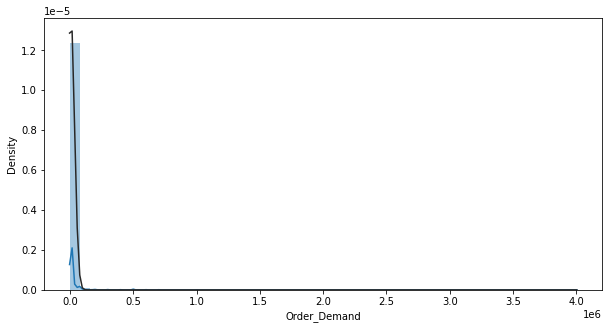

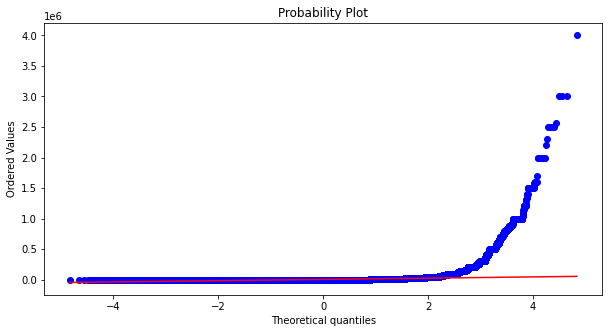

In [10]:
from scipy.stats import norm, skew #Import Norm and skew for some statistics
from scipy import stats #Import stats
import statsmodels.api as sm #for decomposing the trends, seasonality etc.

from statsmodels.tsa.statespace.sarimax import SARIMAX #for the Seasonal Forecast


#Lets check the ditribution of the target variable (Order_Demand)
from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 10,5

sn.distplot(df['Order_Demand'],fit=norm)

#Get the QQ-plot
fig = plt.figure()
res = stats.probplot(df['Order_Demand'], plot=plt)
plt.show()

In [11]:
df['Warehouse'].value_counts().sort_values(ascending=False)

Whse_J    764447
Whse_A    142335
Whse_S     88200
Whse_C     42354
Name: Warehouse, dtype: int64

In [12]:
#Now I will get the amount of orders shipped by each warehouse.
df.groupby('Warehouse').sum().sort_values('Order_Demand', ascending = False)

,Order_Demand
Warehouse,
Whse_J,3363200396
Whse_S,1038024700
Whse_C,585071404
Whse_A,147877431


In [13]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

In [14]:
df2 = df[['Year', 'Warehouse', 'Order_Demand']].groupby(['Year', 'Warehouse'], as_index=False).count()

In [15]:
df2  = df2.pivot(index='Year', columns='Warehouse', values='Order_Demand')

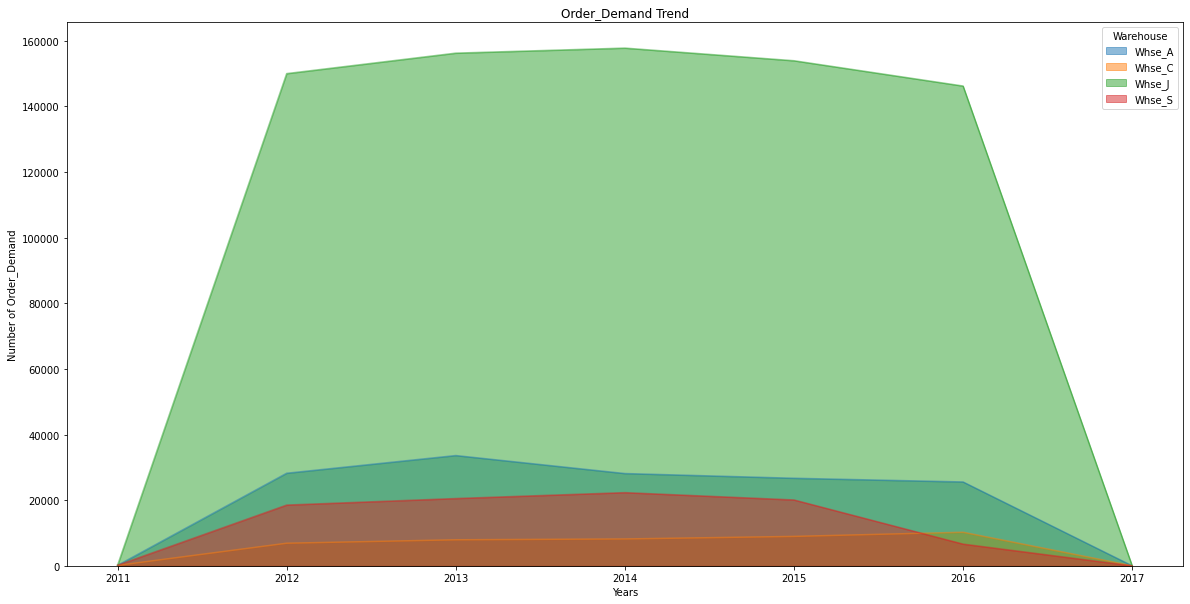

In [16]:
df2.index = df2.index.map(int) # let's change the index values of df2 to type integer for plotting
df2.plot(kind='area', stacked=False, figsize=(20, 10))

plt.title('Order_Demand Trend')
plt.ylabel('Number of Order_Demand')
plt.xlabel('Years')
plt.show()

In [17]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink', 'red']
explode_list = [0.2, 0, 0, 0, 0, 0, 0.2] # ratio for each year with which to offset each wedge.

df2['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list 
                            )

# scale the title up by 12% to match pctdistance
plt.title('Order_Demand Trend [2011 - 2017]', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df2.index, loc='upper left') 

plt.show()


KeyError: 'Total'

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


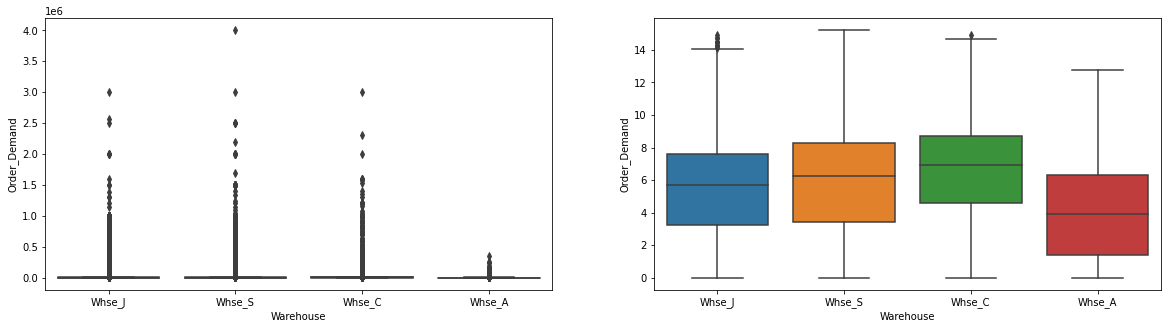

In [18]:
rcParams['figure.figsize']=20,5 #Figure Size in Inches for Plotting
f, axes = plt.subplots(1,2)
normalDW=sn.boxplot(df['Warehouse'],df['Order_Demand'],ax=axes[0]) #Create a variable for Regular Data for WH and OD 

logWH=sn.boxplot(df['Warehouse'],np.log1p(df['Order_Demand']),ax=axes[1]) #Craete a Variable with Log Transformation


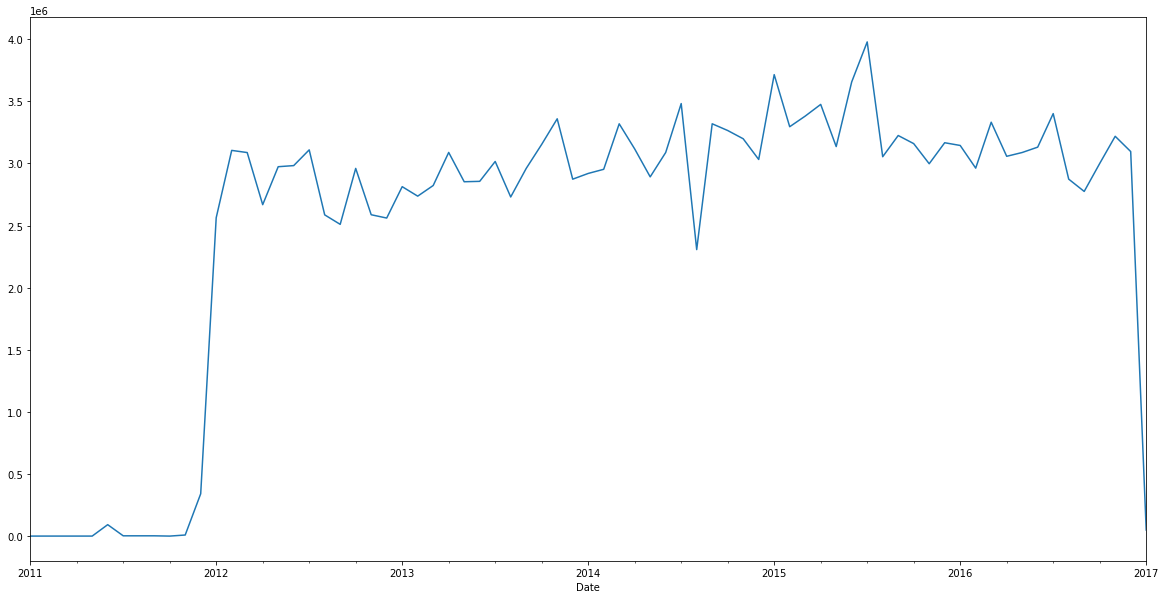

In [19]:
df=df.groupby('Date')['Order_Demand'].sum().reset_index()
#Step-02: Indexing the Date Column as for further procssing.
df = df.set_index('Date')
df.index #Lets check the index
#Step-03:#Averages daily sales value for the month, and we are using the start of each month as the timestamp.
monthly_avg_sales = df['Order_Demand'].resample('MS').mean()
#In case there are Null values, they can be imputed using bfill.
monthly_avg_sales = monthly_avg_sales.fillna(monthly_avg_sales.bfill())
#Visualizing time series.

monthly_avg_sales.plot(figsize=(20,10))
plt.show()

**Displaying the trends with their seasons**

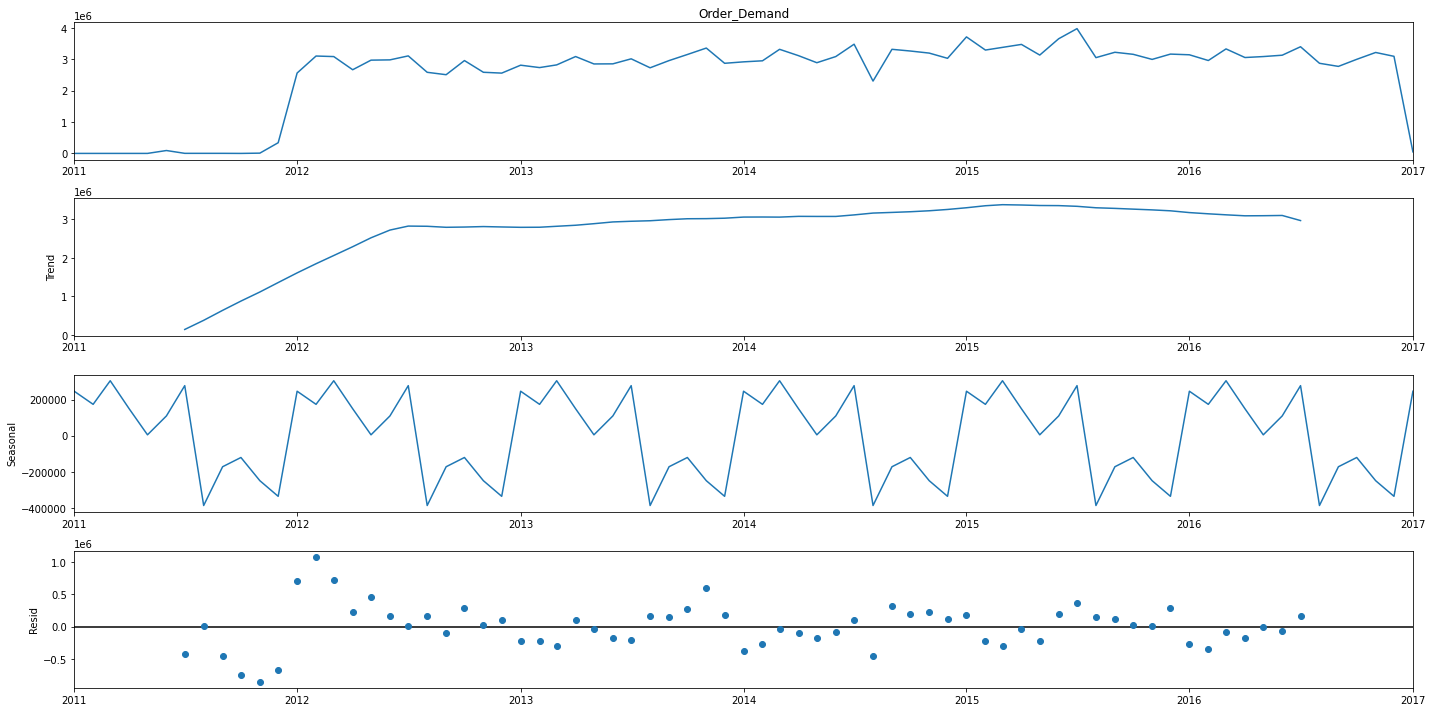

In [20]:
#Using Time Series for Decomposition. 
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 20, 10
decomposition = sm.tsa.seasonal_decompose(monthly_avg_sales, model='additive')
fig = decomposition.plot()
plt.show()

In [21]:
df.head()

,Order_Demand
Date,
2011-01-08,2
2011-05-31,108
2011-06-24,92000
2011-09-02,1250
2011-09-27,28


In [22]:
df2.head()

Warehouse,Whse_A,Whse_C,Whse_J,Whse_S
Year,,,,
2011,138.0,135.0,193.0,174.0
2012,28218.0,6889.0,150013.0,18515.0
2013,33607.0,7934.0,156251.0,20506.0
2014,28124.0,8187.0,157786.0,22307.0
2015,26686.0,8963.0,153937.0,20075.0


Creating the ARIMA Model

In [23]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
#print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX1: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX2: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX3: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX4: {} x {}'.format(pdq[2], seasonal_pdq[4]))

#STEP-02:
#Get the best params for the data. Choose the lowest AIC.

# The Akaike information criterion (AIC) is an estimator of the relative quality of statistical models for a 
# given set of data. 
# AIC measures how well a model fits the data while taking into account the overall complexity of the model.
# Large AIC: Model fits very well using a lot of features.
# Small AIC: Model fits similar fit but using lesser features. 
# Hence LOWER THE AIC, the better it is.

#The code tests the given params using sarimax and outputs the AIC scores.

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(monthly_avg_sales,
                                            order=param,
                                            seasonal_order=param_seasonal,enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

SARIMAX1: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX2: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX3: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX4: (0, 1, 0) x (1, 0, 0, 12)
SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2344.0704307124033
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1934.1928835402202
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1862.6079313938828
SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1413.1955930564604
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1897.8374721163148


/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1997.2321572752192
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1440.6014550343189
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1414.0578928049881
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2265.276799776314
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1876.5613755956679
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1790.8025464719374
SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1412.3527721130954
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1934.8291713242158
SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1872.868645832047
SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1471.9391345294637
SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1414.2544026189005
SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2081.849011696963
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1728.3815053402643
SARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:1741.6306755793414
SARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1386.126892704832
SARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:1752.2949192972621
SARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1727.5980407023796
SARIMA(0, 1, 0)x(1, 1, 0, 12)12 - A

In [24]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
mod = sm.tsa.statespace.SARIMAX(monthly_avg_sales,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1130      0.828     -0.137      0.891      -1.736       1.510
ma.L1         -0.6431      0.621     -1.035      0.301      -1.861       0.575
ma.S.L12      -1.0802      0.028    -38.878      0.000      -1.135      -1.026
sigma2      3.708e+11   1.89e-12   1.96e+23      0.000    3.71e+11    3.71e+11
